## Data Description

Bank marketing campaigns dataset analysis # Opening a Term Deposit
It is a dataset that describing Portugal bank marketing campaigns results.
Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.
If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'

Sourse of the data
https://archive.ics.uci.edu/ml/datasets/bank+marketing

Citation Request:

This dataset is public available for research. The details are described in S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Title: Bank Marketing (with social/economic context)

Sources
Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014

Past Usage:

The full dataset (bank-additional-full.csv) was described and analyzed in:

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.

Relevant Information:

This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns).
Using the rminer package and R tool (http://cran.r-project.org/web/packages/rminer/), we found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included. Note: the file can be read in R using: d=read.table("bank-additional-full.csv",header=TRUE,sep=";")

The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

Number of Instances: 41188 for bank-additional-full.csv

Number of Attributes: 20 + output attribute.

Attribute information:

For more information, read [Moro et al., 2014].

Input variables:

bank client data:
*1 - age (numeric)

*2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

*3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

*4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - default: has credit in default? (categorical: "no","yes","unknown")

6 - housing: has housing loan? (categorical: "no","yes","unknown")

7 - loan: has personal loan? (categorical: "no","yes","unknown")

related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: "cellular","telephone")
*9 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

*10 - dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

*11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:
*12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

*13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

*14 - previous: number of contacts performed before this campaign and for this client (numeric)

1515 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

social and economic context attributes
*16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

*17 - cons.price.idx: consumer price index - monthly indicator (numeric)

*18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

*19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bank-additional-full.csv", sep=";")

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## General

### Is this dataset balanced?

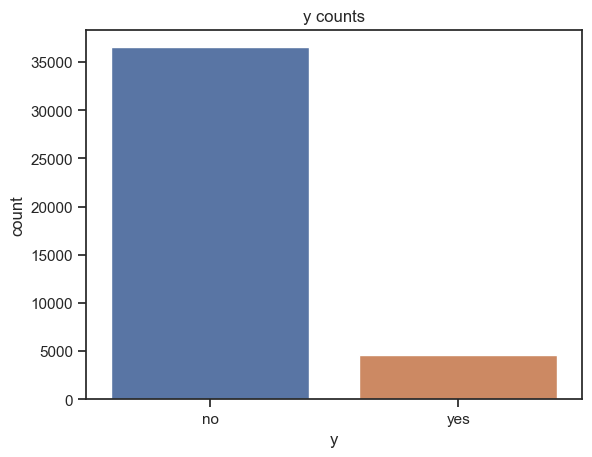

In [102]:
g = sns.countplot(data=df, x="y")
g.set_title("y counts")
plt.show()

In [129]:
total = df.groupby("y")["y"].count()
no, yes = total[0], total[1]
yes/(no+yes)

0.11265417111780131

In [134]:
yes, no

(4640, 36548)

The dataset is not balanced only 11% containts positive records.

### Overview of distributions

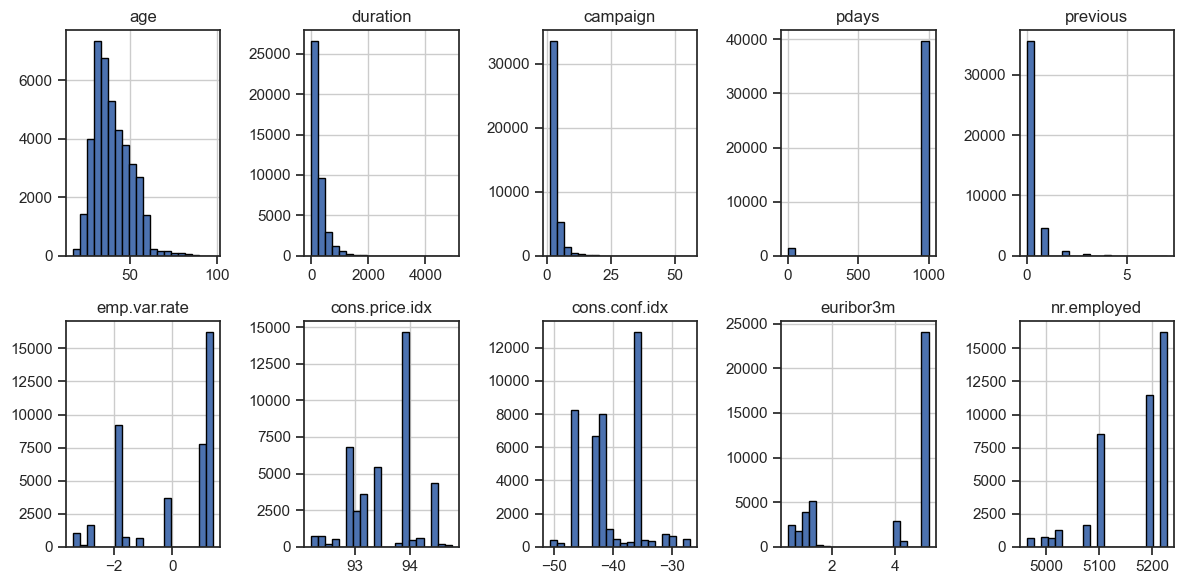

In [106]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=20, figsize=(12, 6), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

## Age

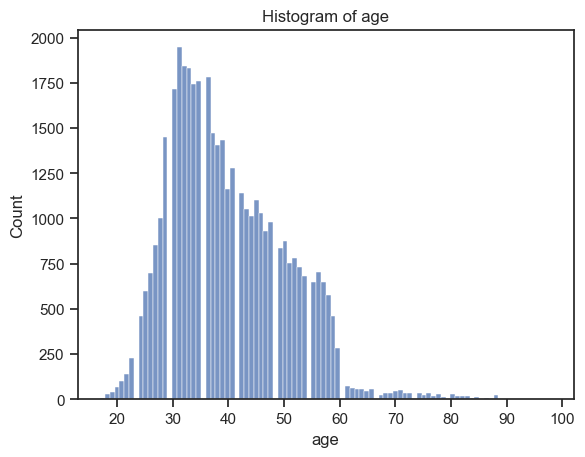

In [75]:
sns.histplot(data=df, x='age')
plt.title("Histogram of age")
plt.show()

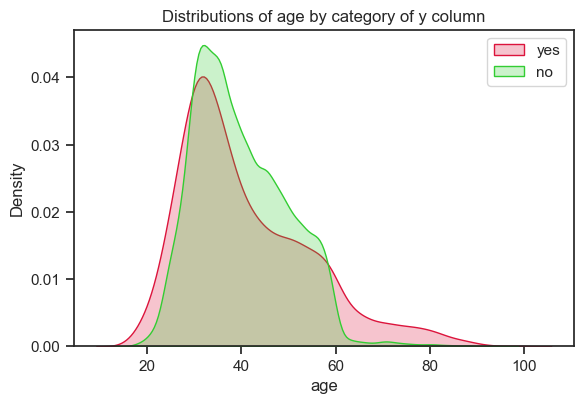

In [144]:
# KDE plots for each subset - one containng records in y column with "yes", other with "no"
# The plots are not w.r.t. the whole dataset since it is unbalanced
fig, ax = plt.subplots(figsize=(6, 4))
sns.kdeplot(data=df[df["y"]=="yes"], x='age', 
            color='crimson', label='yes', fill=True, ax=ax)
sns.kdeplot(data=df[df["y"]=="no"], x='age',
            color='limegreen', label='no', fill=True, ax=ax)
ax.legend()
plt.tight_layout()

plt.title("Distributions of age by category of y column")
plt.show()

### What preferences of yes/no is there by age? 

In [509]:
x = df.groupby(["age", "y"])["y"].count().unstack(fill_value=0).stack()
x

age  y  
17   no      3
     yes     2
18   no     16
     yes    12
19   no     22
            ..
94   yes     0
95   no      1
     yes     0
98   no      0
     yes     2
Length: 156, dtype: int64

In [510]:
x.info()

<class 'pandas.core.series.Series'>
MultiIndex: 156 entries, (17, 'no') to (98, 'yes')
Series name: None
Non-Null Count  Dtype
--------------  -----
156 non-null    int64
dtypes: int64(1)
memory usage: 4.4+ KB


In [511]:
x

age  y  
17   no      3
     yes     2
18   no     16
     yes    12
19   no     22
            ..
94   yes     0
95   no      1
     yes     0
98   no      0
     yes     2
Length: 156, dtype: int64

In [512]:
x = x.reset_index()
x.head()

,age,y,0
0,17,no,3
1,17,yes,2
2,18,no,16
3,18,yes,12
4,19,no,22


In [513]:
x.columns = ['age', 'y', 'count']
x

,age,y,count
0,17,no,3
1,17,yes,2
2,18,no,16
3,18,yes,12
4,19,no,22
...,...,...,...
151,94,yes,0
152,95,no,1
153,95,yes,0
154,98,no,0


In [514]:
x = x.pivot_table(values='count', index=x.age, columns=['y'], aggfunc='first').reset_index()
x

y,age,no,yes
0,17,3,2
1,18,16,12
2,19,22,20
3,20,42,23
4,21,73,29
...,...,...,...
73,91,2,0
74,92,1,3
75,94,1,0
76,95,1,0


In [515]:
x["ratio"] = x["yes"]/(x["yes"] + x["no"])
x

y,age,no,yes,ratio
0,17,3,2,0.400000
1,18,16,12,0.428571
2,19,22,20,0.476190
3,20,42,23,0.353846
4,21,73,29,0.284314
...,...,...,...,...
73,91,2,0,0.000000
74,92,1,3,0.750000
75,94,1,0,0.000000
76,95,1,0,0.000000


<AxesSubplot: xlabel='age', ylabel='ratio'>

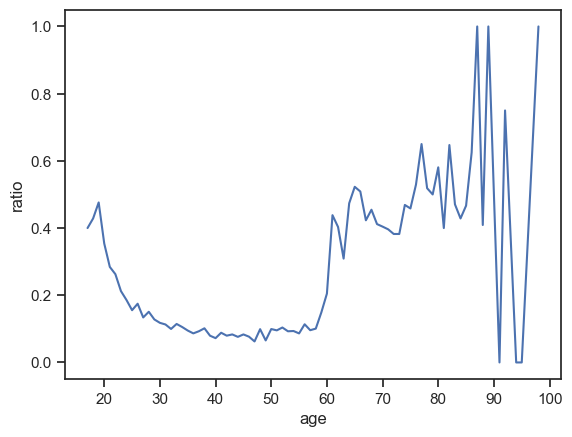

In [517]:
sns.lineplot(x=x["age"], y=x["ratio"])

In [519]:
table = x
table["error"] = 1/table["yes"]
table = table[table.error < 2]
table

y,age,no,yes,ratio,error
0,17,3,2,0.400000,0.500000
1,18,16,12,0.428571,0.083333
2,19,22,20,0.476190,0.050000
3,20,42,23,0.353846,0.043478
4,21,73,29,0.284314,0.034483
...,...,...,...,...,...
70,87,0,1,1.000000,1.000000
71,88,13,9,0.409091,0.111111
72,89,0,2,1.000000,0.500000
74,92,1,3,0.750000,0.333333


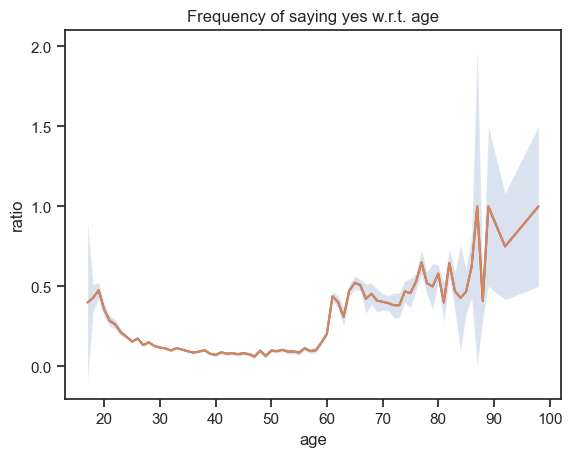

In [528]:
fig, ax = plt.subplots()
ax.plot(table["age"], table["ratio"], '-')
ax.fill_between(table["age"], table["ratio"] - table["error"], table["ratio"] + table["error"], alpha=0.2)
ax.set_ylabel("ratio")
ax.set_xlabel("age")
ax.set_title("Frequency of saying yes w.r.t. age")
ax.plot(table["age"], table["ratio"])

Blue regions are only to indicate the uncertainty, the fewer people with certain age the less certain the observation. It is estimated by 1 over the sum number of responses yes's and no's. The only conclusion is that age between 25 and 60 does not play any role in the prediction. 

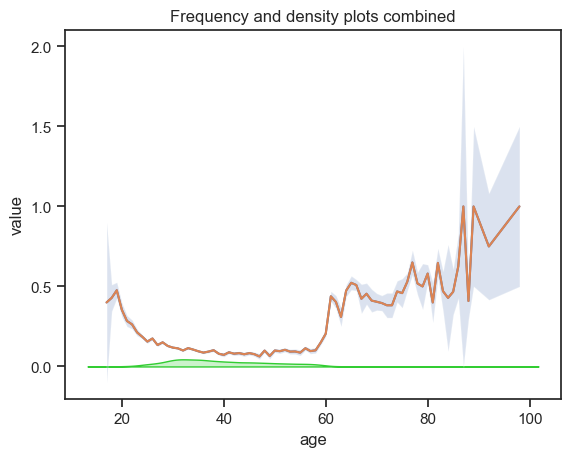

In [555]:
fig, ax = plt.subplots()
sns.kdeplot(data=df, x='age', 
            color='limegreen', label='no', fill=True, ax=ax)
ax.plot(table["age"], table["ratio"], '-')
ax.fill_between(table["age"], table["ratio"] - table["error"], table["ratio"] + table["error"], alpha=0.2)
ax.set_title("Frequency and density plots combined")
ax.set_ylabel("value")
ax.plot(table["age"], table["ratio"])

## Job

In [27]:
df["job"].value_counts(0)

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

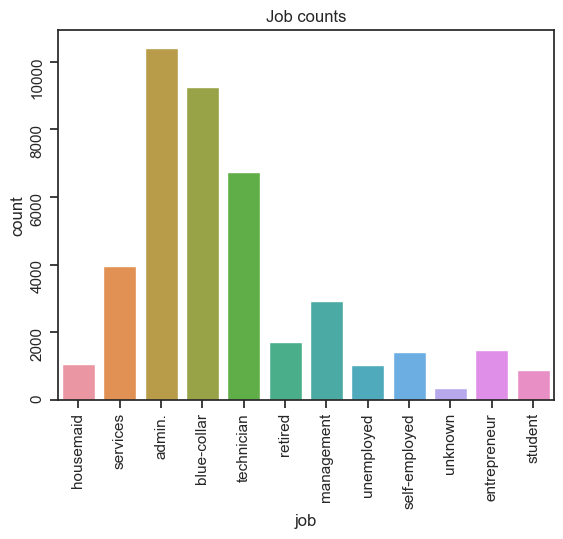

In [93]:
g = sns.countplot(data=df, x="job")
g.axes.tick_params(labelrotation=90)
g.set_title("Job counts")
plt.show()

## Marital

In [58]:
df["marital"].value_counts(0)

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

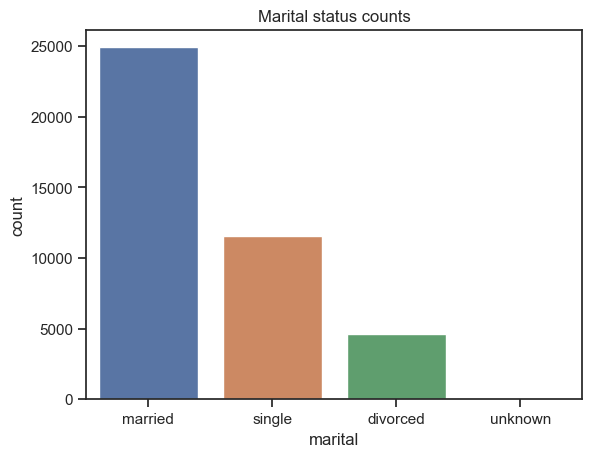

In [79]:
g = sns.countplot(x=df["marital"])
g.set_title("Marital status counts")
plt.show()

## Education

In [60]:
df["education"].value_counts(0)

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

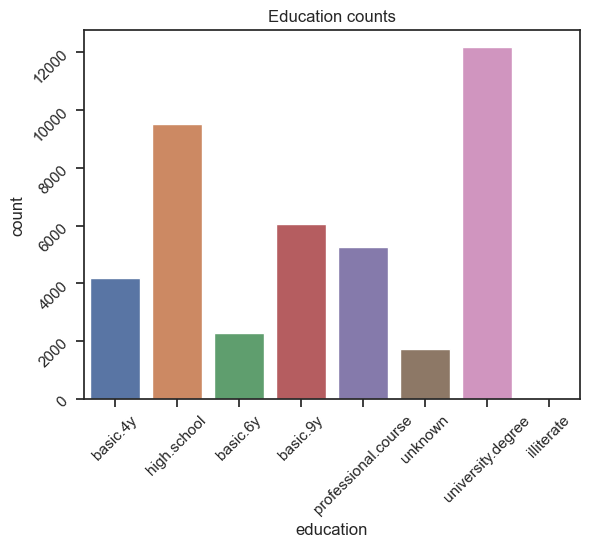

In [95]:
g = sns.countplot(data=df, x="education")
g.axes.tick_params(labelrotation=45)
g.set_title("Education counts")
plt.show()

## Default

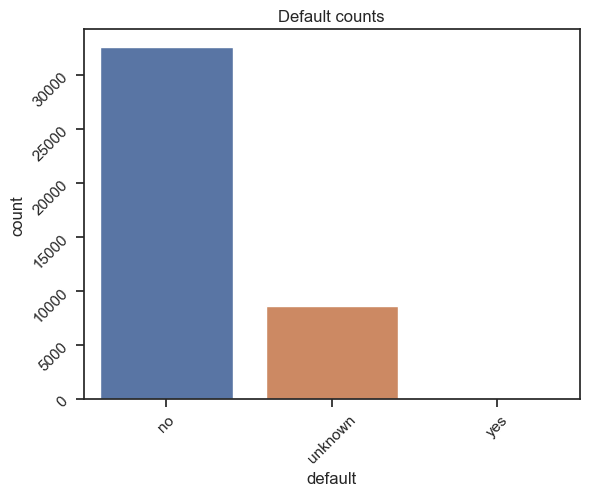

In [96]:
g = sns.countplot(data=df, x="default")
g.axes.tick_params(labelrotation=45)
g.set_title("Default counts")
plt.show()

## Housing

## Loan

## Contact

## Month

## Day of week

## Duration

## Campaign

## Pdays

## Previous

## Poutcome

## emp.var.rate

## cons.price.idx

## cons.conf.idx

## euribor3m

## nr.employed

# Correlations

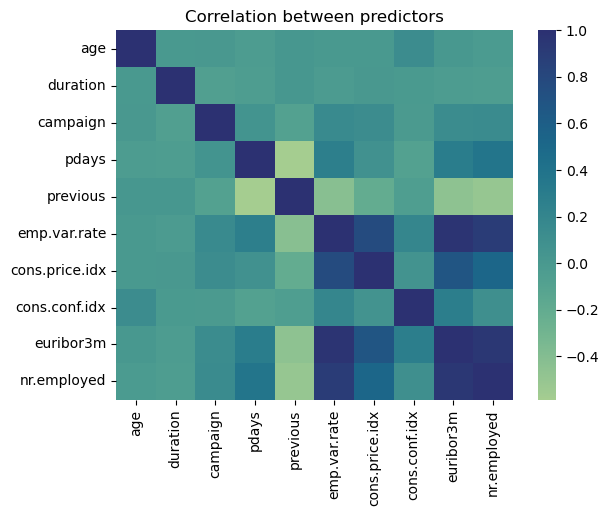

In [7]:
corr_matrix = df.corr(numeric_only=True)
heatmap = sns.heatmap(corr_matrix, cmap="crest")
heatmap.set(title="Correlation between predictors")
plt.show()